In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf

In [3]:
#download data
portfolio=["BCE","QSR","MRU.TO","ENB","TD","WCN","OTEX","FNV","FTS"]
start_date="2019-8-31"
end_date="2024-8-31"
data=yf.download(portfolio, start=start_date, end=end_date, interval="1d", actions=True)
data.index=pd.to_datetime(data.index)
data_monthly=data.resample('M').last()
data_MonthPD=data_monthly[['Close','Dividends']].stack(level=1).reset_index()

[*********************100%%**********************]  9 of 9 completed


In [4]:
#sort stock by first letter
data_MonthPD=data_MonthPD.rename(columns={'level_1':'Ticker'})
data_MonthPD=data_MonthPD.sort_values(by=['Ticker','Date']).reset_index(drop=True)
data_MonthPD['ID']=data_MonthPD.groupby('Ticker').ngroup()+1
print(data_MonthPD)

          Date Ticker       Close  Dividends  ID
0   2019-09-30    BCE   48.410000        0.0   1
1   2019-10-31    BCE   47.450001        0.0   1
2   2019-11-30    BCE   48.070000        0.0   1
3   2019-12-31    BCE   46.349998        0.0   1
4   2020-01-31    BCE   47.119999        0.0   1
..         ...    ...         ...        ...  ..
535 2024-04-30    WCN  162.089996        0.0   9
536 2024-05-31    WCN  164.320007        0.0   9
537 2024-06-30    WCN  175.360001        0.0   9
538 2024-07-31    WCN  177.770004        0.0   9
539 2024-08-31    WCN  186.500000        0.0   9

[540 rows x 5 columns]


In [5]:
#Calculate monthly return
data_MonthPD['Monthly-Return']=data_MonthPD.groupby('Ticker').\
apply(lambda x:(x['Close']+x['Dividends'])/x['Close'].shift(1)-1).\
reset_index(level=0,drop=True)
print(data_MonthPD)

          Date Ticker       Close  Dividends  ID  Monthly-Return
0   2019-09-30    BCE   48.410000        0.0   1             NaN
1   2019-10-31    BCE   47.450001        0.0   1       -0.019831
2   2019-11-30    BCE   48.070000        0.0   1        0.013066
3   2019-12-31    BCE   46.349998        0.0   1       -0.035781
4   2020-01-31    BCE   47.119999        0.0   1        0.016613
..         ...    ...         ...        ...  ..             ...
535 2024-04-30    WCN  162.089996        0.0   9       -0.057671
536 2024-05-31    WCN  164.320007        0.0   9        0.013758
537 2024-06-30    WCN  175.360001        0.0   9        0.067186
538 2024-07-31    WCN  177.770004        0.0   9        0.013743
539 2024-08-31    WCN  186.500000        0.0   9        0.049108

[540 rows x 6 columns]


In [6]:
std_dev_results=[]
for i in range(1,10):
    now_group=data_MonthPD[data_MonthPD['ID']<=i]
    month_avg_return=now_group.groupby('Date')['Monthly-Return'].mean()
    std_dev_60month=month_avg_return.tail(60).std()
    std_dev_results.append((i,std_dev_60month))
std_dev=pd.DataFrame(std_dev_results, columns=['Stock Number','Std Dev'])
print(std_dev)

   Stock Number   Std Dev
0             1  0.049838
1             2  0.053034
2             3  0.054673
3             4  0.049736
4             5  0.043550
5             6  0.045296
6             7  0.046155
7             8  0.045390
8             9  0.044902


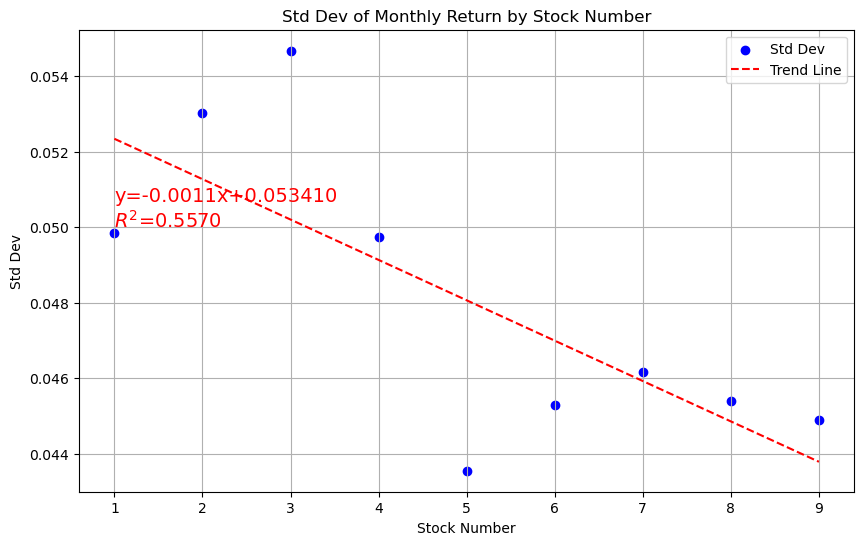

In [7]:
x=std_dev['Stock Number'].values.reshape(-1,1)
y=std_dev['Std Dev'].values
#scotter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='Std Dev')
#liner regression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

slope=model.coef_[0]
intercept=model.intercept_
r_square=model.score(x,y)

plt.plot(x,y_pred,color='red',linestyle='--',label='Trend Line')

equation_text=f"y={slope:.4f}x+{intercept:4f}\n$R^2$={r_square:.4f}"
plt.text(1,0.05,equation_text,fontsize=14,color='red')

plt.title('Std Dev of Monthly Return by Stock Number')
plt.xlabel('Stock Number')
plt.ylabel('Std Dev')
plt.legend()

plt.grid()
plt.show()

In [8]:
#sort stock by first letter,descending
data_MonthPD=data_MonthPD.rename(columns={'level_1':'Ticker'})
data_MonthPD=data_MonthPD.sort_values(by=['Ticker','Date'],ascending=[False,True]).reset_index(drop=True)
data_MonthPD['ID']=data_MonthPD.groupby('Ticker').ngroup(ascending=False)+1
print(data_MonthPD)

          Date Ticker      Close  Dividends  ID  Monthly-Return
0   2019-09-30    WCN  92.000000        0.0   1             NaN
1   2019-10-31    WCN  92.400002        0.0   1        0.004348
2   2019-11-30    WCN  90.550003        0.0   1       -0.020022
3   2019-12-31    WCN  90.790001        0.0   1        0.002650
4   2020-01-31    WCN  96.309998        0.0   1        0.060800
..         ...    ...        ...        ...  ..             ...
535 2024-04-30    BCE  32.849998        0.0   9       -0.033255
536 2024-05-31    BCE  34.209999        0.0   9        0.041400
537 2024-06-30    BCE  32.369999        0.0   9       -0.053785
538 2024-07-31    BCE  33.730000        0.0   9        0.042014
539 2024-08-31    BCE  35.000000        0.0   9        0.037652

[540 rows x 6 columns]


In [9]:
#Calculate monthly return
data_MonthPD['Monthly-Return']=data_MonthPD.groupby('Ticker').\
apply(lambda x:(x['Close']+x['Dividends'])/x['Close'].shift(1)-1).\
reset_index(level=0,drop=True)
print(data_MonthPD)

          Date Ticker      Close  Dividends  ID  Monthly-Return
0   2019-09-30    WCN  92.000000        0.0   1             NaN
1   2019-10-31    WCN  92.400002        0.0   1        0.004348
2   2019-11-30    WCN  90.550003        0.0   1       -0.020022
3   2019-12-31    WCN  90.790001        0.0   1        0.002650
4   2020-01-31    WCN  96.309998        0.0   1        0.060800
..         ...    ...        ...        ...  ..             ...
535 2024-04-30    BCE  32.849998        0.0   9       -0.033255
536 2024-05-31    BCE  34.209999        0.0   9        0.041400
537 2024-06-30    BCE  32.369999        0.0   9       -0.053785
538 2024-07-31    BCE  33.730000        0.0   9        0.042014
539 2024-08-31    BCE  35.000000        0.0   9        0.037652

[540 rows x 6 columns]


In [10]:
std_dev_results=[]
for i in range(1,10):
    now_group=data_MonthPD[data_MonthPD['ID']<=i]
    month_avg_return=now_group.groupby('Date')['Monthly-Return'].mean()
    std_dev_60month=month_avg_return.tail(60).std()
    std_dev_results.append((i,std_dev_60month))
std_dev=pd.DataFrame(std_dev_results, columns=['Stock Number','Std Dev'])
print(std_dev)

   Stock Number   Std Dev
0             1  0.058342
1             2  0.050755
2             3  0.055408
3             4  0.056341
4             5  0.046632
5             6  0.043968
6             7  0.045284
7             8  0.045940
8             9  0.044902


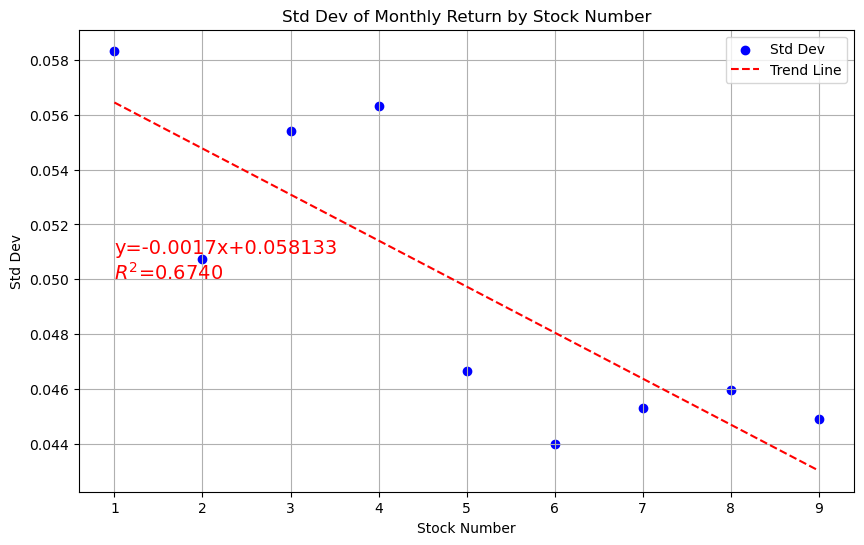

In [12]:
x=std_dev['Stock Number'].values.reshape(-1,1)
y=std_dev['Std Dev'].values
#scotter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='Std Dev')
#liner regression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

slope=model.coef_[0]
intercept=model.intercept_
r_square=model.score(x,y)

plt.plot(x,y_pred,color='red',linestyle='--',label='Trend Line')

equation_text=f"y={slope:.4f}x+{intercept:4f}\n$R^2$={r_square:.4f}"
plt.text(1,0.05,equation_text,fontsize=14,color='red')

plt.title('Std Dev of Monthly Return by Stock Number')
plt.xlabel('Stock Number')
plt.ylabel('Std Dev')
plt.legend()

plt.grid()
plt.show()